In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class ActualSolutions:
    def __init__(self, h, v0):
        self.h = h
        self.v0 = v0
        self.g = 9.8
        self.x = np.linspace(0, 5, 100)
        self.eq = self.y(self.x)
    def y(self, t):
        return -0.5 * self.g * t**2 + self.v0 * t + self.h
    def plotting(self):
        plt.plot(self.x, self.eq, label='Object Trajectory')
        plt.xlabel('Time')
        plt.ylabel('Vertical Distance (m)')
        plt.title('Object Trajectory without Air Resistance')
        plt.legend()
        plt.grid(True)
        plt.show()
    def time(self):
        a = -0.5 * self.g
        b = self.v0
        c = self.h
        discriminant = b**2 - 4 * a * c
        if discriminant >= 0:
            t_impact = (-b + np.sqrt(discriminant)) / (2 * a)
            print(f'Time of impact: {t_impact:.2f} seconds')
        else:
            print('The object does not hit the ground.')
    

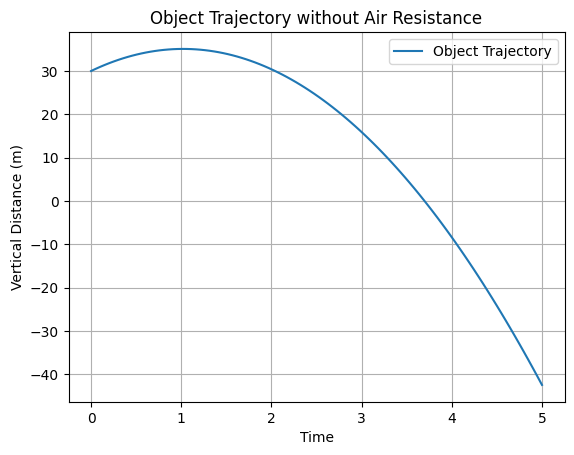

Time of impact: -1.66 seconds


In [4]:
sol = ActualSolutions(30, 10)
sol.plotting()
sol.time()

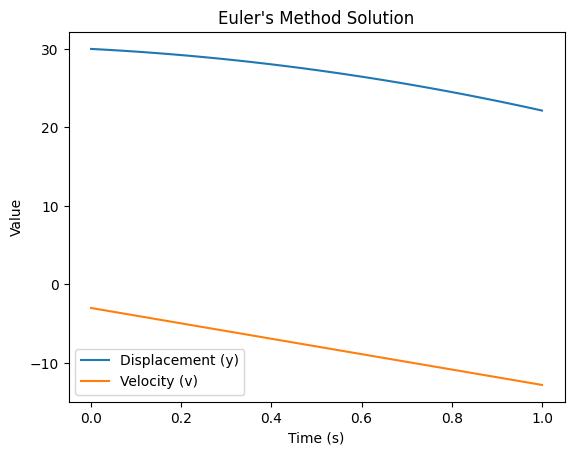

In [5]:
def Eulers(h, v0):
    g = 9.8
    T = 1.0 
    dt = 0.01  
    num_steps = int(T / dt) + 1
    tval = np.linspace(0, T, num_steps)
    yval = np.zeros(num_steps)
    vval = np.zeros(num_steps)

    yval[0] = h
    vval[0] = v0

    # Euler's method
    for i in range(1, num_steps):
        # Update variables using Euler's method
        yval[i] = yval[i-1] + vval[i-1] * dt
        vval[i] = vval[i-1] - g * dt
    return tval, yval, vval

time_values, y_values, v_values = Eulers(30, -3)


plt.plot(time_values, y_values, label='Displacement (y)')
plt.plot(time_values, v_values, label='Velocity (v)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.title("Euler's Method Solution")
plt.show()


In [1]:
class FEM:
    def __init__(self, h, height, V0):
        self.h = h
        self.height = height
        self.V0 = V0
        self.x = self.x = np.linspace(0, (self.v0**2) / self.g * 2, 100)
    def second_derivative_matrix(self):
        N = len(self.x)
        dx = self.x[1] - self.x[0]

        # Generate the matrix for the second derivative using a five-point stencil
        main_diag = np.ones(N) * (-5.0 / 2 / dx**2)
        off_diag = np.ones(N - 1) * 4 / 3 / dx**2
        off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))

        D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(
            off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)

        return D2

    
    

NameError: name 'h' is not defined